In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import layers
from keras import models
from keras.applications.vgg16 import VGG16

## Mount google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Copy dataset

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/train  /content

# Load dataset

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/preprocessing.py  /content

In [ ]:
import preprocessing

In [ ]:
X_train, X_val, y_train, y_val = preprocessing.loadData()

# Create model

In [ ]:
img_size = 128

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [ ]:
conv_base.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


# Compile model

In [ ]:
import math
initial_learning_rate = 0.0001
epochs = 50
decay = initial_learning_rate / epochs
def lr_exp_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit model

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs = epochs,
    shuffle=True,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay)],
) 

Epoch 1/50
150/150 [==============================] - 34s 140ms/step - loss: 0.5498 - accuracy: 0.7287 - val_loss: 0.4257 - val_accuracy: 0.8079 - lr: 1.0000e-04
Epoch 2/50
150/150 [==============================] - 19s 124ms/step - loss: 0.3884 - accuracy: 0.8491 - val_loss: 0.3368 - val_accuracy: 0.8617 - lr: 1.0000e-04
Epoch 3/50
150/150 [==============================] - 19s 126ms/step - loss: 0.3243 - accuracy: 0.8808 - val_loss: 0.2877 - val_accuracy: 0.8996 - lr: 9.9999e-05
Epoch 4/50
150/150 [==============================] - 19s 127ms/step - loss: 0.2807 - accuracy: 0.9006 - val_loss: 0.2655 - val_accuracy: 0.8842 - lr: 9.9999e-05
Epoch 5/50
150/150 [==============================] - 20s 136ms/step - loss: 0.2536 - accuracy: 0.9097 - val_loss: 0.2352 - val_accuracy: 0.9067 - lr: 9.9998e-05
Epoch 6/50
150/150 [==============================] - 19s 128ms/step - loss: 0.2282 - accuracy: 0.9193 - val_loss: 0.2186 - val_accuracy: 0.9100 - lr: 9.9997e-05
Epoch 7/50
150/150 [========

## Save model

In [ ]:
model.save('./VGG.h5', overwrite=True)

# Evaluate model

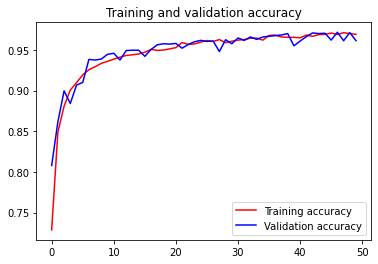

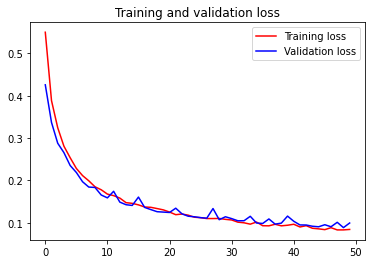

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy', color='r')
plt.plot(epochs, val_acc, label='Validation accuracy', color='b')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='r')
plt.plot(epochs, val_loss, label='Validation loss', color='b')
plt.title('Training and validation loss')
plt.legend()

plt.show()